# Predict sales revenue

Feature Descriptions
1. TV - Spend on TV Advertisements
2. Radio - Spend on radio Advertisements
3. Newspaper - Spend on newspaper Advertisements
4. Sales - Sales revenue generated

Sales is dependent / target variable

TV, Radio and Newspaper are independent variables

import numpy and pandas

In [120]:
import numpy as np
import pandas as pd

Load Advertising data set

In [121]:
data = pd.read_csv("Advertising.csv")

In [122]:
type(data)

pandas.core.frame.DataFrame

In [123]:
data.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


First column is index and we do not need it. So remove the first column 

In [125]:
data = data[["TV", "Radio", "Newspaper", "Sales"]]

In [126]:
#data = data.drop("Unnamed: 0", axis = 1)

In [127]:
data.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


# Explore the data set

Is there a relationship between sales and spend on various advertising channels?

Load matplotlib and seaborn libraries for visual analytics

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Visualize pairwise correlations

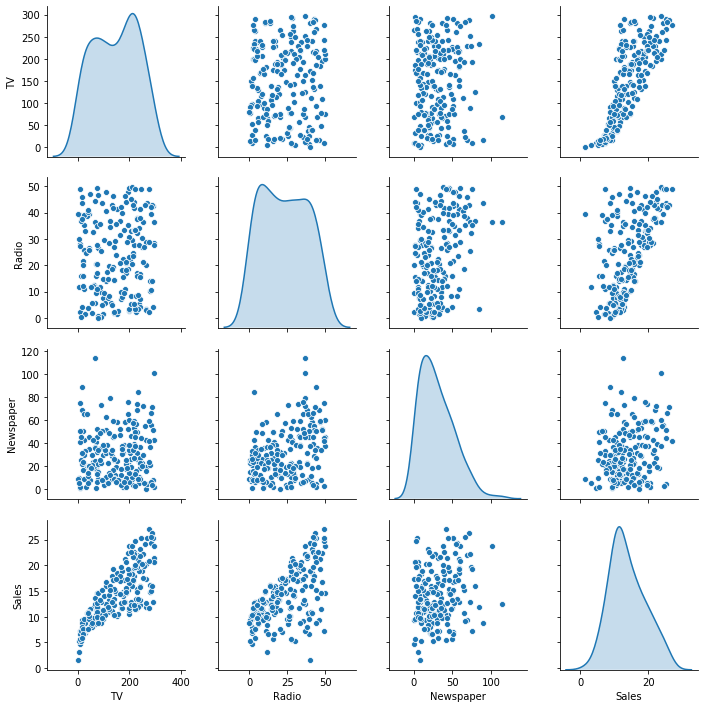

In [129]:
sns.pairplot( data , diag_kind='kde')
plt.show()

Any observations from the above graph?

There is a strong positive correlation between TV and sales.
There is less correlation between Radio and sales.
Newspaper has no correlation wth any.

Calculate correlations

In [130]:
data.TV.corr( data.Sales )

0.7822244248616061

In [131]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Visualize the correlations

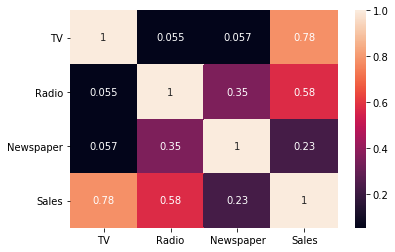

In [132]:
sns.heatmap( data.corr(), annot=True)
plt.show()

Observations: 
1. The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. We can observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and then between sales and radio i.e. 0.576.
2. Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with strong correlations are mostly probably candidates for model builing.

# Predict Sales revenue using TV advertisement expenditure

Sales = beta_0 + beta_1*TV

sklearn library has a comprehensive set of APIs to split datasets, build models, test models and calculate accuracy metrics.

Import linear regression api from sklearn

In [133]:
from sklearn.linear_model import LinearRegression

Initial imported linear regression model api

In [134]:
linreg = LinearRegression()

Prepare input data set

In [135]:
x = data[['TV']]

In [136]:
type(x)

pandas.core.frame.DataFrame

In [137]:
y = data[['Sales']]

In [138]:
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Find the intercept beta_0 and slope beta_1

In [139]:
linreg.intercept_

array([7.03259355])

In [140]:
linreg.coef_

array([[0.04753664]])

Now the Sales prediction equation can be written as: 
 
Sales = beta_0 + beta_1 * TV

Sales = 7.03 + 0.0475 * TV

Sales = linreg.intercept_ + linreg.coef_ * TV

## Interpretation of slope or beta_1 or linreg.coef_

In [141]:
#Analyzing beta_1 or slope or linreg.coef_
#beta_1 = 0.0475, means that for every $1000 spent on TV advertising, the Sales is going to be increased by 47.5 units

# Make predictions for the new TV advertisment expenditure data

Suppose TV = 150 . Predict Sales?

In [142]:
TV = 150
Sales = linreg.intercept_ + linreg.coef_*TV

In [143]:
Sales

array([[14.16308961]])

We can also use inbuilt function for prediction

In [144]:
newData = {'TV': [150, 200, 250]}
newData = pd.DataFrame(data=newData)  ## Observe that 'x' type is pandas dataframe

In [145]:
linreg.predict(newData)

array([[14.16308961],
       [16.53992164],
       [18.91675366]])

Calculate accuracy of the built model

In [146]:
model = linreg.fit(x, y)

In [147]:
SalesPredictions = model.predict(x)

In [148]:
SalesPredictions[0:5]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814]])

In [149]:
y[0:5]

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [150]:
model.coef_

array([[0.04753664]])

In [151]:
model.intercept_

array([7.03259355])

Calculate root mean sequare error: RMSE

In [152]:
from sklearn import metrics

mean_sequare_error = sum(i = 1 to 200 (y_i - SalesPredictions_i)^2 )/200

In [153]:
metrics.mean_squared_error(SalesPredictions, y)

10.512652915656757

In [154]:
rmse = np.sqrt(metrics.mean_squared_error(SalesPredictions, y))

In [155]:
rmse

3.2423221486546887

In [156]:
avgSales = np.mean(y)

In [157]:
avgSales

Sales    14.0225
dtype: float64

In [158]:
## Error percentage
## RMSE percentage

In [159]:
rmse/avgSales*100

Sales    23.122283
dtype: float64

In [160]:
# R^2
model.score(x,y)

0.611875050850071

In [161]:
0.782224*0.782224  ### Corr(TV, Sales) * Corr(TV, Sales)

0.6118743861760001

# Model 1

Build Sales = beta_0 + beta_1 * TV

In [162]:
x = data[["TV"]]
y = data[["Sales"]]

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [165]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
#y-predict for train-set
predictedSales = model1.predict(x_train)

#MSE for train-set
mse = metrics.mean_squared_error(predictedSales, y_train)

#calculate train-RMSE = sqrt(train-MSE)
trainRmse = np.sqrt(mse)
print(trainRmse)

#y-predict for test-set
predictedSales = model1.predict(x_test)

#MSE for test-set
mse = metrics.mean_squared_error(predictedSales, y_test)

#calculate test-RMSE = sqrt(test-MSE)
testRmse = np.sqrt(mse)
print(testRmse)

3.23913079545511
3.251316261863333


In [167]:
#avgSales must always come from training-set, i.e,  y_train
#It is always assumed that training-set and test-set come from same distribution.Underlying distribution is the same.

#calculating train-RMSE percentage = (train-RMSE/avgSales)*100
trainRmse_percent = trainRmse/np.mean(y_train)*100
print(trainRmse_percent)

Sales    23.48655
dtype: float64


In [168]:
#avgSales must always come from training-set, i.e,  y_train
#It is always assumed that training-set and test-set come from same distribution.Underlying distribution is the same.

#calculating test-RMSE percentage = (test-RMSE/avgSales)*100
testRmse_percent = testRmse/np.mean(y_train)*100
print(testRmse_percent)

Sales    23.574906
dtype: float64


In [169]:
#coef_ is the model coefficient beta_1

model1.coef_

array([[0.04812204]])

In [170]:
#intercept_ is the model coefficient beta_0

model1.intercept_

array([6.92351954])

Analyze beta_0 and beta_1

In [171]:
#Analyzing beta_1 - slope - model.coef_
#beta_1 = 0.065, means that for every $1000 spent on TV advertising, the Sales is going to be increased by 48 units

#Analyzing beta_0 - intercept - model.intercept_
#beta_0 = 6.924, means that even if there is no expenditure on TV advertising, i.e,  there is no TV advertising at all, 
#still the Sales will be 6924 units.

Analyze R^2

In [172]:
#score for train-data : Model score is R^2
#calculate train-R^2

model1.score(x_train, y_train)

0.6233294771480009

In [173]:
#score for test-data : Model score is R^2
#calculate test-R^2

model1.score(x_test, y_test)

0.575061860494331

In [174]:
#Analyse R^2
#62% of the variability explained by the model is coming from train-R^2
#58% of the variability explained by the model is coming from test-R^2
#Since, train-R^2 is approximately equal to test-R^2, we can conclude that this is good fit model.

Analyze RMSE

In [175]:
predictedSales = model1.predict(x_train)
mse = metrics.mean_squared_error(predictedSales, y_train)
rmse_train = np.sqrt(mse)
print(rmse_train)

predictedSales = model1.predict(x_test)
mse = metrics.mean_squared_error(predictedSales, y_test)
rmse_test = np.sqrt(mse)
print(rmse_test)

3.23913079545511
3.251316261863333


In [176]:
#Analyzing RMSE (rmse = sqrt(mse))
#rmse_train = 3.239 means, in training data, actual sales for TV advertising deviate from true regression line
#by 3240 units, i.e, the actual sales for TV advertising will be off by 3240 units
#rmse_test = 3.2513 means, in test data, actual sales for TV advertising deviate from true regression line
#by 3250 units, i.e, the actual sales for TV advertising will be off by 3250 units

# Model 2

Build Sales = beta_0 + beta_1 * Radio

In [177]:
x = data[["Radio"]]
y = data[["Sales"]]

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [180]:
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
x = data[["Radio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [182]:
#y-predict for train-set
predictedSales = model2.predict(x_train)

#MSE for train-set
mse = metrics.mean_squared_error(predictedSales, y_train)

#calculate train-RMSE = sqrt(train-MSE)
trainRmse = np.sqrt(mse)
print(trainRmse)

#y-predict for test-set
predictedSales = model2.predict(x_test)

#MSE for test-set
mse = metrics.mean_squared_error(predictedSales, y_test)

#calculate test-RMSE = sqrt(test-MSE)
testRmse = np.sqrt(mse)
print(testRmse)

4.441526424991245
3.8215351050686674


In [183]:
#To show that avg sales will be same for both y_train and y_test
print(np.mean(y_train))
print(np.mean(y_test))

Sales    13.791429
dtype: float64
Sales    14.561667
dtype: float64


In [184]:
#avgSales must always come from training-set, i.e,  y_train
#It is always assumed that training-set and test-set come from same distribution.Underlying distribution is the same.

#calculating train-RMSE percentage = (train-RMSE/avgSales)*100
trainRmse_percent = trainRmse/np.mean(y_train)*100
print(trainRmse_percent)

Sales    32.204977
dtype: float64


In [185]:
#avgSales must always come from training-set, i.e,  y_train
#It is always assumed that training-set and test-set come from same distribution.Underlying distribution is the same.

#calculating test-RMSE percentage = (test-RMSE/avgSales)*100
testRmse_percent = testRmse/np.mean(y_train)*100
print(testRmse_percent)

Sales    27.709494
dtype: float64


In [186]:
#coef_ is the model coefficient beta_1

model2.coef_

array([[0.1874808]])

In [187]:
#intercept_ is the model coefficient beta_0

model2.intercept_

array([9.44093656])

Analyze beta_0 and beta_1

In [188]:
#Analyzing beta_1 - slope - model.coef_
#beta_1 = 0.187, means that for every $1000 spent on TV advertising, the Sales is going to be increased by 187 units

#Analyzing beta_0 - intercept - model.intercept_
#beta_0 = 9.440, means that even if there is no expenditure on TV advertising, i.e,  there is no TV advertising at all, 
#still the Sales will be 9440 units.

Analyze R^2

In [189]:
#score for train-data : Model score is R^2
#calculate train-R^2

model2.score(x_train, y_train)

0.2917784045936668

In [190]:
#score for test-data : Model score is R^2
#calculate test-R^2

model2.score(x_test, y_test)

0.41293932917162335

In [191]:
#Analyse R^2
#30% of the variability explained by the model is coming from train-R^2
#40% of the variability explained by the model is coming from test-R^2
#Since, train-R^2 is less than test-R^2, significantly, we can conclude that this is an underfit model.

Analyze RMSE

In [192]:
predictedSales = model2.predict(x_train)
mse = metrics.mean_squared_error(predictedSales, y_train)
rmse_train = np.sqrt(mse)
print(rmse_train)

predictedSales = model2.predict(x_test)
mse = metrics.mean_squared_error(predictedSales, y_test)
rmse_test = np.sqrt(mse)
print(rmse_test)

4.441526424991245
3.8215351050686674


In [193]:
#Analyzing RMSE (rmse = sqrt(mse))
#rmse_train = 4.4415 means, in training data, actual sales for TV advertising deviate from true regression line
#by 4442 units, i.e, the actual sales for TV advertising will be off by 4442 units
#rmse_test = 3.821 means, in test data, actual sales for TV advertising deviate from true regression line
#by 3820 units, i.e, the actual sales for TV advertising will be off by 3820 units

# Model 3

Build Sales = beta_0 + beta_1 * Newspaper

In [194]:
x = data[["Newspaper"]]
y = data[["Sales"]]

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [197]:
model3 = LinearRegression()
model3.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
predictedSales = model3.predict(x_train)
mse = metrics.mean_squared_error(predictedSales, y_train)
trainRmse = np.sqrt(mse)
print(trainRmse)
predictedSales = model3.predict(x_test)
mse = metrics.mean_squared_error(predictedSales, y_test)
testRmse = np.sqrt(mse)
print(testRmse)

5.0873665220166195
5.049500210358935


In [199]:
#avgSales must always come from training-set, i.e,  y_train
#It is always assumed that training-set and test-set come from same distribution.Underlying distribution is the same.

#calculating train-RMSE percentage = (train-RMSE/avgSales)*100
trainRmse_percent = trainRmse/np.mean(y_train)*100
print(trainRmse_percent)

Sales    36.887887
dtype: float64


In [200]:
#avgSales must always come from training-set, i.e,  y_train
#It is always assumed that training-set and test-set come from same distribution.Underlying distribution is the same.

#calculating test-RMSE percentage = (test-RMSE/avgSales)*100
testRmse_percent = testRmse/np.mean(y_train)*100
print(testRmse_percent)

Sales    36.613322
dtype: float64


In [201]:
#coef_ is the model coefficient beta_1

model3.coef_

array([[0.06532045]])

In [202]:
#intercept_ is the model coefficient beta_0

model3.intercept_

array([11.82966888])

Analyze beta_0 and beta_1

In [203]:
#Analyzing beta_1 - slope - model.coef_
#beta_1 = 0.065, means that for every $1000 spent on TV advertising, the Sales is going to be increased by 65 units

#Analyzing beta_0 - intercept - model.intercept_
#beta_0 = 11.83, means that even if there is no expenditure on TV advertising, i.e,  there is no TV advertising at all, 
#still the Sales will be 11830 units.

Analyze R^2

In [204]:
model3.score(x_train, y_train)

0.07083954026885009

In [205]:
model3.score(x_test, y_test)

-0.024953278429509007

In [206]:
#Analyse R^2
#7% of the variability explained by the model is coming from train-R^2
#test-R^2 is negative, so the model is of no use.
#Since, train-R^2 is very less and test-R^2 is negative, we can conclude that this is model cannot be used.

Analyze RMSE

In [207]:
predictedSales = model3.predict(x_train)
mse = metrics.mean_squared_error(predictedSales, y_train)
rmse_train = np.sqrt(mse)
print(rmse_train)

predictedSales = model3.predict(x_test)
mse = metrics.mean_squared_error(predictedSales, y_test)
rmse_test = np.sqrt(mse)
print(rmse_test)

5.0873665220166195
5.049500210358935


In [208]:
#Analyzing RMSE (rmse = sqrt(mse))
#rmse_train = 5.087 means, in training data, actual sales for TV advertising deviate from true regression line
#by 5087 units, i.e, the actual sales for TV advertising will be off by 5087 units
#rmse_test = 5.0495 means, in test data, actual sales for TV advertising deviate from true regression line
#by 5050 units, i.e, the actual sales for TV advertising will be off by 5050 units

# Model 4: Multiple Linear Regression

Build Sales = beta_0 + beta_1 * TV + beta_2 * Radio

In [209]:
data.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [210]:
x = data[["TV", "Radio"]]

In [211]:
x.head(2)

,TV,Radio
0,230.1,37.8
1,44.5,39.3


In [212]:
 y = data[["Sales"]]

In [213]:
y.head(2)

,Sales
0,22.1
1,10.4


In [214]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [215]:
x = data[["TV", "Radio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
model4 = LinearRegression()
model4.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [216]:
predictedSales_train = model4.predict(x_train)
trainmse = metrics.mean_squared_error(predictedSales_train, y_train)
trainRmse = np.sqrt(trainmse)
print(trainRmse)
predictedSales_test = model4.predict(x_test)
testmse = metrics.mean_squared_error(predictedSales_test, y_test)
testRmse = np.sqrt(testmse)
print(testRmse)

1.7900932499897944
1.383728668840889


In [217]:
model4.score(x_train, y_train)

0.8849581188519494

In [218]:
model4.score(x_test, y_test)

0.9230321850256802

In [219]:
model4.intercept_

array([2.96476712])

In [220]:
model4.coef_

array([[0.04697554, 0.17765046]])

Compare R^2 of Model 1 to 4

Any observations?

Model4 is performing better than Model1, as both Train R^2 and Test R^2 for Model4 are more than Model1

# Model 5 : Multiple Linear Regression

Build Sales = beta_0 + beta_1 TV + beta_2 Newspaper

In [136]:
x = data[["TV", "Newspaper"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
model5 = LinearRegression()
model5.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Analyze beta_0, beta_1 and beta_2

In [138]:
predictedSales_train = model5.predict(x_train)
trainmse = metrics.mean_squared_error(predictedSales_train, y_train)
trainRmse = np.sqrt(trainmse)
print(trainRmse)
predictedSales_test = model5.predict(x_test)
testmse = metrics.mean_squared_error(predictedSales_test, y_test)
testRmse = np.sqrt(testmse)
print(testRmse)

3.0348935147241742
3.256452446796941


In [139]:
model5.score(x_train, y_train)

0.6693324482382885

In [140]:
model5.score(x_test, y_test)

0.5737182294128316

In [141]:
model5.intercept_

array([5.46266524])

In [142]:
model5.coef_

array([[0.04725676, 0.05275376]])

Analyse R^2

In [223]:
#Analyse R^2
#67% of the variability explained by the model is coming from train-R^2
#57% of the variability is explained by test-R^2
#Since, train-R^2 and test-R^2 are not very good, we can conclude that this is model is not a very good model

Analyze RMSE

In [222]:
#Analyze RMSE
#Analyzing RMSE (rmse = sqrt(mse))
#rmse_train = 3.0348 means, in training data, actual sales for TV advertising deviate from true regression line
#by 3035 units, i.e, the actual sales for TV advertising will be off by 3035 units
#rmse_test = 3.2564 means, in test data, actual sales for TV advertising deviate from true regression line
#by 3256 units, i.e, the actual sales for TV advertising will be off by 3256 units

# Model 6

Build Sales = beta_0 + beta_1 Radio + beta_2 Newspaper

In [143]:
x = data[["Radio", "Newspaper"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
model6 = LinearRegression()
model6.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Analyze beta_0, beta_1 and beta_2

In [144]:
predictedSales_train = model6.predict(x_train)
trainmse = metrics.mean_squared_error(predictedSales_train, y_train)
trainRmse = np.sqrt(trainmse)
print(trainRmse)
predictedSales_test = model6.predict(x_test)
testmse = metrics.mean_squared_error(predictedSales_test, y_test)
testRmse = np.sqrt(testmse)
print(testRmse)

4.433694441025997
3.8440925228607132


In [145]:
model6.score(x_train, y_train)

0.29427389338734533

In [146]:
model6.score(x_test, y_test)

0.405988375695091

In [147]:
model6.intercept_

array([9.21754347])

In [148]:
model6.coef_

array([[0.17972539, 0.01343054]])

Analyze R^2

In [223]:
#Analyse R^2
#29% of the variability explained by the model is coming from train-R^2
#41% of the variability is explained by test-R^2
#Since, train-R^2 and test-R^2 are not very low, we can conclude that this is model is a bad model

Analyze RMSE

In [224]:
#Analyze RMSE
#Analyzing RMSE (rmse = sqrt(mse))
#rmse_train = 4.4337 means, in training data, actual sales for TV advertising deviate from true regression line
#by 4434 units, i.e, the actual sales for TV advertising will be off by 4434 units
#rmse_test = 3.8441 means, in test data, actual sales for TV advertising deviate from true regression line
#by 3844 units, i.e, the actual sales for TV advertising will be off by 3844 units

# Model 7

Build Sales = beta_0 + beta_1 * TV + beta_2 Radio + beta_3 Newspaper

In [149]:
x = data[["TV", "Radio", "Newspaper"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
model7 = LinearRegression()
model7.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Analyze beta_0, beta_1, beta_2 and beta_3

In [150]:
predictedSales_train = model7.predict(x_train)
trainmse = metrics.mean_squared_error(predictedSales_train, y_train)
trainRmse = np.sqrt(trainmse)
print(trainRmse)
predictedSales_test = model7.predict(x_test)
testmse = metrics.mean_squared_error(predictedSales_test, y_test)
testRmse = np.sqrt(testmse)
print(testRmse)

1.7897255222345274
1.3888574107756972


In [151]:
model7.score(x_train, y_train)

0.8850053786777521

In [152]:
model7.score(x_test, y_test)

0.9224605706201435

In [153]:
model7.intercept_

array([2.93721573])

In [154]:
model7.coef_

array([[0.04695205, 0.17658644, 0.00185115]])

Analyze R^2

In [225]:
#Analyse R^2
#89% of the variability explained by the model is coming from train-R^2
#92% of the variability is explained by test-R^2
#Since, train-R^2 and test-R^2 are not very good, we can conclude that this is model is performing very well and is a good model

Analyze RMSE

In [226]:
#Analyze RMSE
#Analyzing RMSE (rmse = sqrt(mse))
#rmse_train = 1.788 means, in training data, actual sales for TV advertising deviate from true regression line
#by 1788 units, i.e, the actual sales for TV advertising will be off by 1788 units
#rmse_test = 1.388 means, in test data, actual sales for TV advertising deviate from true regression line
#by 1388 units, i.e, the actual sales for TV advertising will be off by 1388 units

# Model 8 : Interaction terms

Build Sales = beta_0 + beta_1 * TV + beta_2 Radio + beta_3 * TV * Radio

In [157]:
data['TvRadio'] = data['TV']*data['Radio']

In [158]:
x = data[["TV", "Radio", "TvRadio"]]

In [159]:
x.head(2)

,TV,Radio,TvRadio
0,230.1,37.8,8697.78
1,44.5,39.3,1748.85


In [160]:
y  = data[["Sales"]]

In [168]:
x = data[["TV", "Radio", "TvRadio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
model8 = LinearRegression()
model8.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Analyze beta_0, beta_1, beta_2 and beta_3

In [169]:
predictedSales_train = model8.predict(x_train)
trainmse = metrics.mean_squared_error(predictedSales_train, y_train)
trainRmse = np.sqrt(trainmse)
print(trainRmse)
predictedSales_test = model8.predict(x_test)
testmse = metrics.mean_squared_error(predictedSales_test, y_test)
testRmse = np.sqrt(testmse)
print(testRmse)

1.016303958230968
0.7144049117782392


In [170]:
model8.score(x_train, y_train)

0.962918960627851

In [171]:
model8.score(x_test, y_test)

0.9794838368850284

In [172]:
model8.intercept_

array([6.88622678])

In [173]:
model8.coef_

array([[0.01861055, 0.02153867, 0.00111581]])

Analyze R^2

In [225]:
#Analyse R^2
#96% of the variability explained by the model is coming from train-R^2
#98% of the variability is explained by test-R^2
#Since, train-R^2 and test-R^2 are extremely good, 
#we can conclude that this is model is the best an is performing extremely well

Analyze RMSE

In [226]:
#Analyze RMSE
#Analyzing RMSE (rmse = sqrt(mse))
#rmse_train = 1.016 means, in training data, actual sales for TV advertising deviate from true regression line
#by 1016 units, i.e, the actual sales for TV advertising will be off by 1016 units
#rmse_test = 0.714 means, in test data, actual sales for TV advertising deviate from true regression line
#by 714 units, i.e, the actual sales for TV advertising will be off by 714 units

Compare R^2 of Model 1 to 8

Any observations?

Compared to Model1 Model8 has very good Train R^2 and Test R^2, so Model8 is better than Model1 and is the best model

Adjusted R^2

In [114]:
## Adjusted R^2
def AdjRsquare(modelToBeTested, indData, target):
    Rsquare = modelToBeTested.score(indData, target)
    NoData = len(target)
    p = indData.shape[1]
    tempRsquare = 1 - (1-Rsquare)*(NoData-1)/(NoData - p - 1)
    return tempRsquare

In [176]:
AdjRsquare(model8, x_test, y_test)

0.978384756718155

In [177]:
model8.score(x_test, y_test)

0.9794838368850284

In [178]:
x_test.shape

(60, 3)

In [179]:
seed = 7

## Function to find Model Performance of all models

In [182]:
## Combine all the steps to test the model performance
def linRegcheckModelPerformance(x, y):
    model9 = LinearRegression()
    
    # Covert data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                        random_state = seed)
    
    # Build model with train data set
    model9.fit(x_train, y_train)
    
    # Train accuracies
    trainR2 = model9.score(x_train, y_train)
    predictedSales_train = model9.predict(x_train)
    mse_train = metrics.mean_squared_error(predictedSales_train, y_train)
    trainRmse = np.sqrt(mse_train)
    trainRmsePct = trainRmse/np.mean(np.mean(np.array(y_train)))*100
    trainAdjR2 = AdjRsquare(model9, x_train, y_train)
    trainAccuracies = [len(y_train), trainRmse, trainRmsePct, trainR2, trainAdjR2]
    
    # Test accuracies
    testR2 = model9.score(x_test, y_test)
    predictedSales_test = model9.predict(x_test)
    mse_test = metrics.mean_squared_error(predictedSales_test, y_test)
    testRmse = np.sqrt(mse_test)
    testRmsePct = testRmse/np.mean(np.mean(np.array(y_test)))*100
    testAdjR2 = AdjRsquare(model9, x_test, y_test)
    testAccuracies = [len(y_test), testRmse, testRmsePct, testR2, testAdjR2]
    
    # Create dataframe for results
    resultsDf = pd.DataFrame(index = ["dataSize", "rmse", "rmsePct", "r2", "adjR2"])
    resultsDf['trainData'] = trainAccuracies
    resultsDf['testData'] = testAccuracies
    
    return ( round(resultsDf, 4))

In [183]:
# Model 1
x = data[["TV", "Radio"]]
y = data[["Sales"]]
linRegcheckModelPerformance(x, y)

,trainData,testData
dataSize,140.0000,60.0000
rmse,1.6860,1.6471
rmsePct,11.6805,12.6103
r2,0.8970,0.8895
adjR2,0.8955,0.8856


In [184]:
# Model 2
x = data[["Radio", "Newspaper"]]
y = data[["Sales"]]
linRegcheckModelPerformance(x, y)

,trainData,testData
dataSize,140.0000,60.0000
rmse,4.3410,4.0477
rmsePct,30.0739,30.9892
r2,0.3175,0.3324
adjR2,0.3076,0.3090


In [185]:
# Model 3
x = data[["TV", "Newspaper"]]
y = data[["Sales"]]
linRegcheckModelPerformance(x, y)

,trainData,testData
dataSize,140.0000,60.0000
rmse,3.2088,2.8372
rmsePct,22.2307,21.7215
r2,0.6271,0.6720
adjR2,0.6216,0.6605


In [186]:
# Model 7
x = data[["TV", "Radio", "Newspaper"]]
y = data[["Sales"]]
linRegcheckModelPerformance(x, y)

,trainData,testData
dataSize,140.0000,60.0000
rmse,1.6860,1.6471
rmsePct,11.6805,12.6101
r2,0.8970,0.8895
adjR2,0.8948,0.8835


In [ ]:
data["TvRadio"] = data["TV"]*data["Radio"]

In [ ]:
data.head(2)

In [187]:
# Model 8
x = data[["TV", "Radio", "TvRadio"]]
y = data[["Sales"]]
linRegcheckModelPerformance(x, y)

,trainData,testData
dataSize,140.0000,60.0000
rmse,0.9248,0.9601
rmsePct,6.4068,7.3507
r2,0.9690,0.9624
adjR2,0.9683,0.9604
